<a href="https://colab.research.google.com/github/tina3860/Video-Game-Sales/blob/main/EDA2_unofficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Game Sales

Data taken from Kaggle: https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download

This data contains a list of video games with sales greater than 100,000 copies sold. The number of sales are calculated in millions. Publishing dates go from 1989-2020. The data set consists of a mix of strings and floats. Less than 3% of the data set contains null values, it is mainly seen in the 'Year' and 'Publisher' columns. The data set has already been ranked based off of sales and is in descending order. There are over 16,500 games listed in this dataset.

Assumptions consist of viewing the data set as a list of video games sold based off physical copies only. This will not include data of any downloadable version of these games. The focus, in terms of sales, will be averaged from the  Global_Sales column. This gives you a general idea of worldwide sales which can easily be broken down and investigated further if analysis requires it.






In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/EDA/EDA datasets/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Clean Data


Encoding

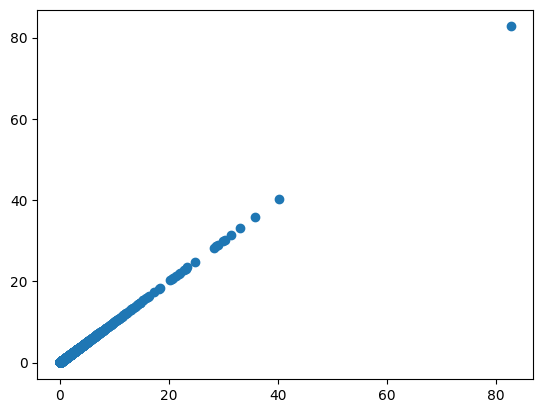

0        26
1        11
2        26
3        26
4         5
         ..
16593     6
16594     7
16595    16
16596     4
16597     6
Name: Platform_encoded, Length: 16598, dtype: int64
0        10
1         4
2         6
3        10
4         7
         ..
16593     4
16594     8
16595     6
16596     5
16597     4
Name: Genre_encoded, Length: 16598, dtype: int64
0        359
1        359
2        359
3        359
4        359
        ... 
16593    269
16594    241
16595     21
16596      8
16597    546
Name: Publisher_encoded, Length: 16598, dtype: int64


In [ ]:
#encode categories to numeric for comparison purposes
  # Creating a instance of label Encoder.
le = LabelEncoder()

  # Using .fit_transform function to fit label
  # encoder and return encoded label
df['Platform_encoded'] = le.fit_transform(df['Platform'])
df['Genre_encoded'] = le.fit_transform(df['Genre'])
df['Publisher_encoded'] = le.fit_transform(df['Publisher'])

print(df['Platform_encoded'])
print(df['Genre_encoded'])
print(df['Publisher_encoded'])

# EDA

1. Are there any correlation between the variables?

<Axes: >

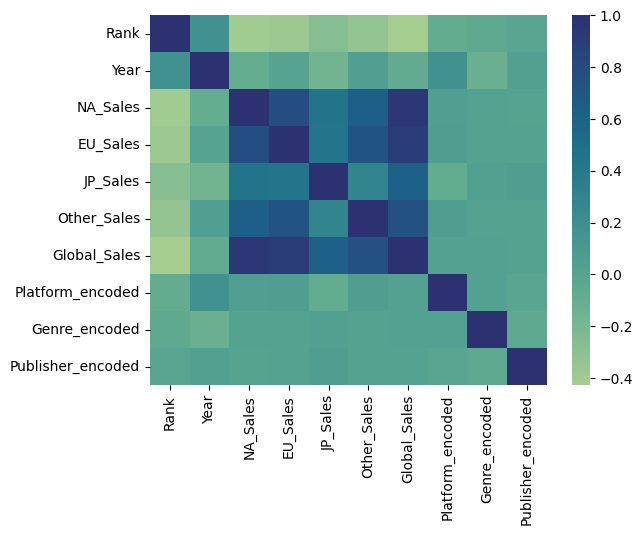

In [ ]:
corr = df.corr(numeric_only=True)
#changing color
sns.color_palette("crest", as_cmap=True)
sns.heatmap(corr,cmap= "crest")

1. Avg number of sales per year?

Year
1980.0    1.264444
1981.0    0.777609
1982.0    0.801667
1983.0    0.987647
1984.0    3.597143
1985.0    3.852857
1986.0    1.765238
1987.0    1.358750
1988.0    3.148000
1989.0    4.320588
1990.0    3.086875
1991.0    0.786098
1992.0    1.771163
1993.0    0.766333
1994.0    0.654298
1995.0    0.402329
1996.0    0.757224
1997.0    0.695433
1998.0    0.676702
1999.0    0.743402
2000.0    0.577536
2001.0    0.687697
2002.0    0.477105
2003.0    0.461742
2004.0    0.549554
2005.0    0.488778
2006.0    0.516905
2007.0    0.508428
2008.0    0.475420
2009.0    0.466317
2010.0    0.476926
2011.0    0.453020
2012.0    0.553333
2013.0    0.674194
2014.0    0.579124
2015.0    0.430684
2016.0    0.206192
2017.0    0.016667
2020.0    0.290000
Name: Global_Sales, dtype: float64


Text(0.5, 1.0, 'Average Global Sales per Year')

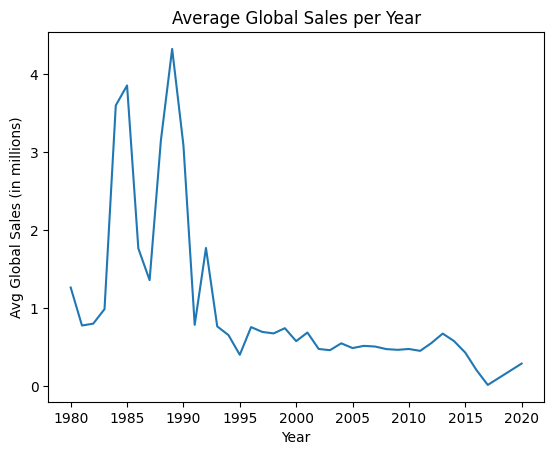

In [ ]:
#avg number of sales per year
avg_sales_per_year = df.groupby('Year')['Global_Sales'].mean()
print(avg_sales_per_year)

#plot
avg_sales_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Avg Global Sales (in millions)')
plt.title('Average Global Sales per Year')

The difference lies in how the data is aggregated and presented in the resulting DataFrame or Series.

1. **`groupby(['Platform', 'Global_Sales'])`:** This groups the data by both the 'Platform' and 'Global_Sales' columns. It creates a multi-index DataFrame where the combinations of 'Platform' and 'Global_Sales' are the index. It's useful when you want to see how sales are distributed across different platforms and also across different sales values. This can be helpful if you want to analyze how different platforms perform across various sales levels.

2. **`groupby('Platform')['Global_Sales']`:** This groups the data only by the 'Platform' column. It calculates the total sales for each platform, resulting in a Series where the platform names are the index and the total sales are the values. This is useful when you want to see the total sales for each platform individually, without considering different sales values within each platform. It provides a clearer view of each platform's overall performance in terms of sales.

In summary, the difference is in the level of granularity in the analysis:

- Using `groupby(['Platform', 'Global_Sales'])` provides a more granular analysis, considering sales at different levels for each platform.
- Using `groupby('Platform')['Global_Sales']` provides a higher-level overview, focusing on the total sales for each platform.

2. Explore the highest and lowest peaks of average sales throughout the years. Investigate Platform Dominance.


max year: 1989.0
avg sale for max: 4.320588235294117
min year: 2017.0
avg sale for min: 0.016666666666666666
range: 4.303921568627451
Platform
2600      2.09
DS        0.02
GB       66.41
NES     156.39
PC        0.06
Name: Global_Sales, dtype: float64


Text(0, 0.5, 'Avg Global Sales (millions)')

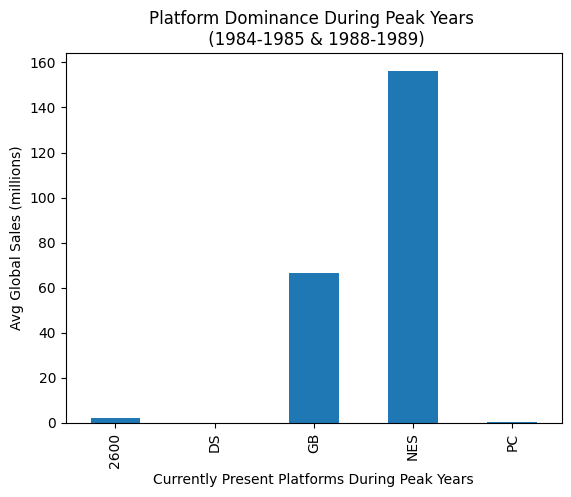

In [ ]:
#What platforms have been the most prominent between these time periods

  #Max
max_index = avg_sales_per_year.idxmax()
print('max year: '+ str(max_index))
print('avg sale for max: ' + str(max(avg_sales_per_year)))

  #min
min_index = avg_sales_per_year.idxmin()
print('min year: ' +str(min_index))
print('avg sale for min: ' + str(min(avg_sales_per_year)))

  #ptp value(max-min) finding range between the max and min
range = np.ptp(avg_sales_per_year)
print('range: ' + str(range))

  #sort the data from highest to lowest to view which years have the highest peaks
sorted_avg_sales_desc = avg_sales_per_year.sort_values(ascending=False)

sorted_avg_sales_desc.head(15) #1984-1989 are during the peak years with a drop in between at 1986-1987. 2017 the lowest, two major drops also included 1986-1987 and 1991-1992.

# Filter the DataFrame to include only the rows where the 'Year' column is in 1984, 1985, 1988, or 1989
plat_peaks = df[df['Year'].isin([1984, 1985, 1988, 1989])]
# Group by 'Platform' and sum 'Global_Sales' for each group
peaks_platform = plat_peaks.groupby('Platform')['Global_Sales'].sum()
print(peaks_platform)

#plot
peaks_platform.plot(kind='bar')
plt.title('Platform Dominance During Peak Years \n (1984-1985 & 1988-1989)')
plt.xlabel('Currently Present Platforms During Peak Years')
plt.ylabel('Avg Global Sales (millions)')




In [ ]:
#top 5games sold during this time

# Filter the DataFrame to include only the rows where the 'Year' column is in 1984, 1985, 1988, or 1989
plat_peaks = df[df['Year'].isin([1984, 1985, 1988, 1989])]
#groupby platform and name and sum global sales for each group
games_plat = plat_peaks.groupby(['Platform','Name'])['Global_Sales'].sum()
#find the top 5
top5_peak = games_plat.nlargest(5,'all')
print (top5_peak)



Platform  Name               
NES       Super Mario Bros.      40.24
GB        Tetris                 30.26
NES       Duck Hunt              28.31
GB        Super Mario Land       18.14
NES       Super Mario Bros. 3    17.28
Name: Global_Sales, dtype: float64


3. Explore the highest and lowest peaks of average sales throughout the years. Investigate Genre Preference.


Genre
Action          11.76
Fighting         1.05
Misc             2.73
Platform        92.25
Puzzle          49.68
Racing           8.09
Role-Playing     8.08
Shooter         33.81
Simulation       0.06
Sports          17.46
Name: Global_Sales, dtype: float64


Text(0, 0.5, 'Avg Global Sales (millions)')

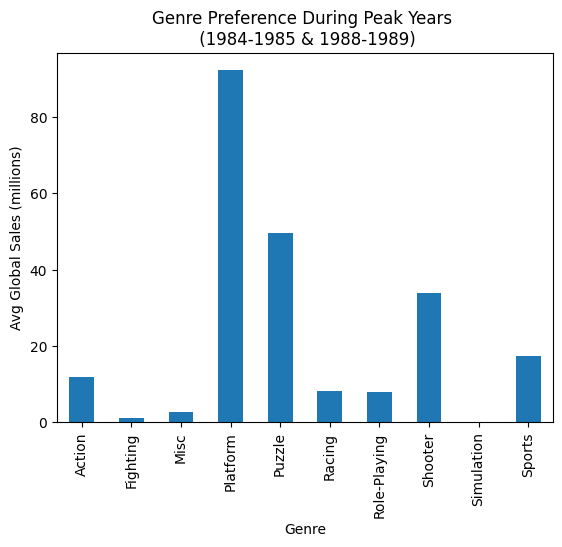

In [ ]:
#Genre Perference

# Filter the DataFrame to include only the rows where the 'Year' column is in 1984, 1985, 1988, or 1989
plat_peaks = df[df['Year'].isin([1984, 1985, 1988, 1989])]
# Group by 'genre' and sum 'Global_Sales' for each group
genre_pref = plat_peaks.groupby('Genre')['Global_Sales'].sum()
print(genre_pref)

#plot
genre_pref.plot(kind='bar')
plt.title('Genre Preference During Peak Years \n (1984-1985 & 1988-1989)')
plt.xlabel('Genre')
plt.ylabel('Avg Global Sales (millions)')

4. Explore the highest and lowest peaks of average sales throughout the years. Investigate Regional Trends.  


        NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year                                             
1984.0     33.28      2.10     14.27         0.70
1985.0     33.73      4.74     14.56         0.92
1986.0     12.50      2.84     19.81         1.93
1987.0      8.46      1.41     11.63         0.20
1988.0     23.87      6.59     15.76         0.99
1989.0     45.15      8.44     18.36         1.50


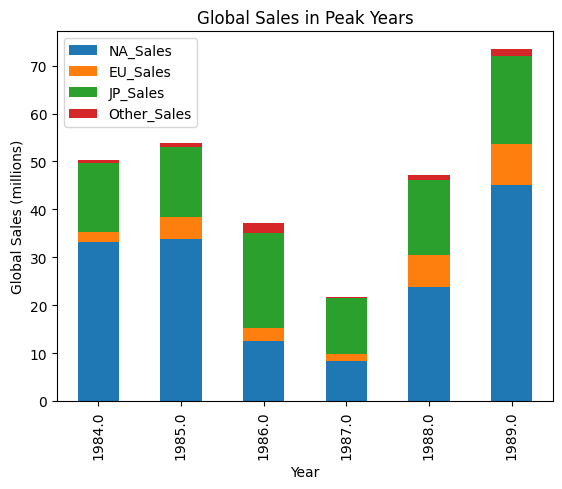

In [ ]:
# Filter the DataFrame to include only the rows where the 'Year' column is in 1984, 1985, 1988, or 1989
plat_peaks = df[df['Year'].isin([1984, 1985, 1986, 1987, 1988, 1989])]

#global sales broken into regions based off of specific years.Group by year and the other regions summed
sales_by_year = plat_peaks.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print(sales_by_year)

#plot stacked bar
sales_by_year.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales in Peak Years')
plt.legend()
plt.show()

The average global sales per year show there was a huge spike in video game sales from 1984 to 1985 and then dropped drastically until peaking again at the highest in 1989. This could be because video games switched from arcade to console and many new companies were emerging and entering this market. There was a small peak afterwards but it ultimately never got as high as it did again. It continues a steady line from 1996 to around 2012-2013. There was an all-time low in copies sold around 2016. This could be a result of gamers turning away from physical copies and entering an era of online gaming and downloads.

5 platform games were available during this period. Nintendo Entertainment Systems (NES) dominated the market during this time with around 156 million copies sold with the most popular games that we recognize to this day like Super Mario Bros with an average global sale of 40 million copies. Following Nintendo, GameBoy sales were a little less than half of NES' sales. Though the system isn't played with much these days, its games during the height of its era are still classics such as Tetris with an average of 30 million copies sold.

Considering the time and technology during this period, it makes sense that Platform games are the most popular games being sold. Puzzle, shooting, sports, and action games are included in the top 5 genres during the peak of copies sold. A platformer is a video game in which the game-play revolves heavily around players controlling a character who runs and jumps onto platforms, runs over obstacles, and avoids enemies. This is usually depicted on a scrolling game screen. Think Super Mario Bros.

Overall, North America makesup for most of the global sales and Japan comes in second. In genrral, it seems there was a jump in sales all over the world when publishers released some of the most popular games we play to this day.


5. Game Trends- What's the trend of genre preferences over time?



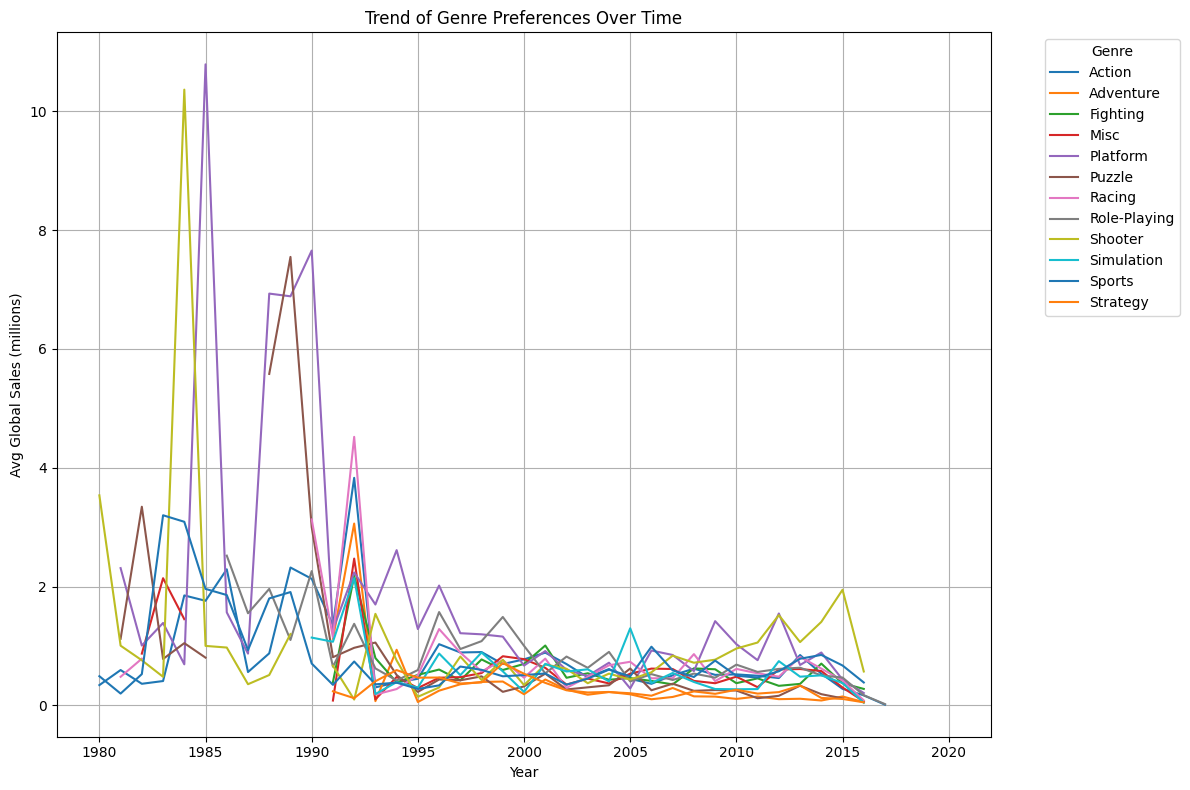

In [ ]:
# Group the data by 'Year' and 'Genre' and calculate the total global sales for each genre in each year
genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].mean().unstack()

# Plot the line graph
plt.figure(figsize=(12, 8))
for genre in genre_sales.columns:
    plt.plot(genre_sales.index, genre_sales[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Avg Global Sales (millions)')
plt.title('Trend of Genre Preferences Over Time')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


5. Game Trends- What's the trend of platform dominance over time?


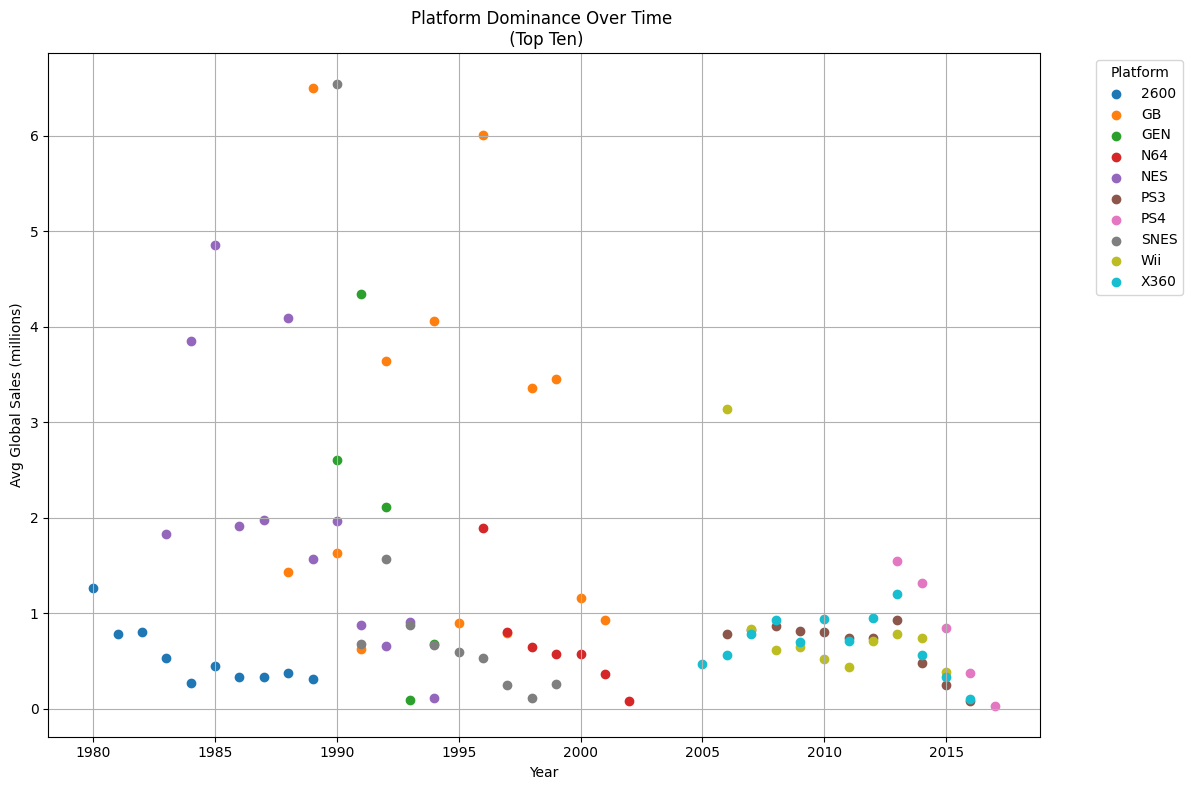

In [ ]:

plat_mean = df.groupby('Platform')['Global_Sales'].mean()
#top10
top_10_platforms = plat_mean.nlargest(10).index

# Group the data by 'Year' and 'Genre' and calculate the total global sales for each genre in each year
platform_sales = df[df['Platform'].isin(top_10_platforms)].groupby(['Year', 'Platform'])['Global_Sales'].mean().unstack()

# Plot the line graph
plt.figure(figsize=(12, 8))
for platform in platform_sales.columns:
    plt.scatter(platform_sales.index, platform_sales[platform], label=platform)

plt.xlabel('Year')
plt.ylabel('Avg Global Sales (millions)')
plt.title('Platform Dominance Over Time \n (Top Ten)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()